In [ ]:
# !pip install seaborn --user

In [1]:
import pandas as pd
import numpy as np
import re
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as smf
import matplotlib.pyplot as plt


In [2]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# DeFi_tweets_raw.csv 
# blockchain_tweets_raw.csv 
# crypto_tweets_raw.csv 

In [ ]:
defi = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/DeFi_tweets_raw.csv', index_col='Date') 

blockchain = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/blockchain_tweets_raw.csv', index_col='Date') 

crypto = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/crypto_tweets_raw.csv', index_col='Date') 

In [ ]:
crypto

,1,raw_tweets,3
Date,,,
2020-10-01 23:59:37+00:00,1311818082315390980,Universe Token Airdrop is now Live🚀💰🏆\n\nClick...,Ogundepo26
2020-10-01 23:59:29+00:00,1311818047070646272,Universe Token Airdrop is now Live🚀💰🏆\n\nClick...,NtimaBenison
2020-10-01 23:59:16+00:00,1311817991906947072,Universe Token Airdrop is now Live🚀💰🏆\n\nClick...,hoangy102
2020-10-01 23:59:13+00:00,1311817979613442048,since coinbase sucks I guess I will go elsewhe...,0xstella
2020-10-01 23:58:59+00:00,1311817920922738689,Market Wrap: Blame @BitMEX as #bitcoin dumps t...,desota
...,...,...,...
2022-09-29 23:44:32+00:00,1575632652933144579,Beta Finance (BETA) went down 10.3 percent in ...,cryptoalerted
2022-09-29 23:44:28+00:00,1575632632360341504,Love to see it?\n\nWho else picked up their 2n...,TIMEPieces
2022-09-29 23:44:23+00:00,1575632615071043586,Current #Cardano price Alert: \n\n#ADA $0.4386...,CardanoTracker


In [ ]:
def clean_text(text):
#will replace the html characters with " "
    text=re.sub('<.*?>', ' ', text)  
    #To remove the punctuations
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    #will consider only alphabets and numerics
    text = re.sub('[^a-zA-Z]',' ',text)  
    #will replace newline with space
    text = re.sub("\n"," ",text)
    #will convert to lower case
    text = text.lower()
    # will split and join the words
    text=' '.join(text.split())
    return text 

In [ ]:
# manual cleaning from some trash 

defi['clean_tweets'] = defi['raw_tweets'].apply(clean_text) 
blockchain['clean_tweets'] = blockchain['raw_tweets'].apply(clean_text) 
crypto['clean_tweets'] = crypto['raw_tweets'].apply(clean_text) 



In [ ]:
# !pip install -U spacy

In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')
sw_spacy = sp.Defaults.stop_words
# print(sw_spacy)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def remove_sw(text):
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text 

In [ ]:
# remove stopwords included in spacy 

defi['clean_sw'] = defi['clean_tweets'].apply(remove_sw) 
blockchain['clean_sw'] = blockchain['clean_tweets'].apply(remove_sw) 
crypto['clean_sw'] = crypto['clean_tweets'].apply(remove_sw) 



In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

In [ ]:
# add 2 columns and get subj and pol for all dataframes 

defi['d_subj'] = defi['clean_sw'].apply(getSubjectivity) 
defi['d_pol'] = defi['clean_sw'].apply(getPolarity) 

blockchain['b_subj'] = blockchain['clean_sw'].apply(getSubjectivity) 
blockchain['b_pol'] = blockchain['clean_sw'].apply(getPolarity) 

crypto['c_subj'] = crypto['clean_sw'].apply(getSubjectivity) 
crypto['c_pol'] = crypto['clean_sw'].apply(getPolarity) 

In [ ]:
defi.drop(columns=['1', 'raw_tweets', '3', 'clean_tweets', 'clean_sw'], inplace=True) 
blockchain.drop(columns=['1', 'raw_tweets', '3', 'clean_tweets', 'clean_sw'], inplace=True) 
crypto.drop(columns=['1', 'raw_tweets', '3', 'clean_tweets', 'clean_sw'], inplace=True) 


In [ ]:
defi.sort_index(inplace=True)
blockchain.sort_index(inplace=True)
crypto.sort_index(inplace=True)



In [ ]:
defi.index = defi.index.astype('datetime64[ns]')
blockchain.index = blockchain.index.astype('datetime64[ns]')
crypto.index = crypto.index.astype('datetime64[ns]')


In [ ]:
avg_de = defi.resample('D').mean() 
avg_bl = blockchain.resample('D').mean() 
avg_cr = crypto.resample('D').mean() 

# avg_polarity.dropna(inplace=True)
# avg_polarity.index = avg_polarity.index.rename('Date')
# avg_polarity.index = avg_polarity.index.astype('datetime64[ns]') 
# avg_polarity 

In [ ]:
avg_de.fillna(method="ffill", inplace=True)
avg_bl.fillna(method="ffill", inplace=True)
avg_cr.fillna(method="ffill", inplace=True)


In [ ]:
avg = pd.DataFrame()
avg = pd.concat([avg_de, avg_bl, avg_cr], axis=1)
avg

,d_subj,d_pol,b_subj,b_pol,c_subj,c_pol
Date,,,,,,
2020-10-01,0.374005,0.208886,0.169704,0.041580,0.543669,0.194602
2020-10-02,0.353624,0.208086,0.288656,0.062248,0.534481,0.198928
2020-10-03,0.468362,0.086743,0.162452,0.008237,0.483005,0.228676
2020-10-04,0.357260,0.126469,0.133554,0.045549,0.449015,0.189158
2020-10-05,0.464102,0.126006,0.167671,0.075926,0.458458,0.196062
...,...,...,...,...,...,...
2022-09-25,0.487059,0.238913,0.200179,-0.010883,0.205816,0.118358
2022-09-26,0.421944,0.170222,0.196209,0.026117,0.365914,0.162379
2022-09-27,0.288444,0.041616,0.230273,0.148313,0.298727,0.160222


In [ ]:
avg['avg_subj'] = avg[['d_subj', 'b_subj', 'c_subj']].mean(axis=1) 
avg['avg_pol'] = avg[['d_pol', 'b_pol', 'c_pol']].mean(axis=1) 
avg 

,d_subj,d_pol,b_subj,b_pol,c_subj,c_pol,avg_subj,avg_pol
Date,,,,,,,,
2020-10-01,0.374005,0.208886,0.169704,0.041580,0.543669,0.194602,0.362459,0.148356
2020-10-02,0.353624,0.208086,0.288656,0.062248,0.534481,0.198928,0.392254,0.156421
2020-10-03,0.468362,0.086743,0.162452,0.008237,0.483005,0.228676,0.371273,0.107885
2020-10-04,0.357260,0.126469,0.133554,0.045549,0.449015,0.189158,0.313276,0.120392
2020-10-05,0.464102,0.126006,0.167671,0.075926,0.458458,0.196062,0.363410,0.132664
...,...,...,...,...,...,...,...,...
2022-09-25,0.487059,0.238913,0.200179,-0.010883,0.205816,0.118358,0.297685,0.115462
2022-09-26,0.421944,0.170222,0.196209,0.026117,0.365914,0.162379,0.328022,0.119573
2022-09-27,0.288444,0.041616,0.230273,0.148313,0.298727,0.160222,0.272481,0.116717


In [ ]:
avg.to_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/avg_pol_3_keywords.csv', index=True) 

In [ ]:
## checking for correlation of twitter polarity with netflow 

avg_pol = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/avg_pol_3_keywords.csv', index_col='Date')  
DPI = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/DPI_aum_netflow_2.csv', index_col='Date')  

In [ ]:
DPI.index = DPI.index.astype('datetime64[ns]')
avg_pol.index = avg_pol.index.astype('datetime64[ns]')


In [ ]:
fin_df = pd.concat([DPI, avg_pol], axis=1) 
fin_df 

,aum,net_flow,DPI_price,d_subj,d_pol,b_subj,b_pol,c_subj,c_pol,avg_subj,avg_pol
Date,,,,,,,,,,,
2020-09-10,9.699631e+02,969.963123,456.753025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-11,6.203445e+03,5854.244309,130.083626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-12,1.040195e+04,2931.811780,132.866086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-13,1.858037e+05,175075.408946,136.837190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-14,6.341173e+05,461649.081363,129.020509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,3.005462e+07,-0.823180,81.524879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-02,2.944343e+07,18624.325293,80.428076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-03,2.967774e+07,0.000000,80.371455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fin_df.dropna(inplace=True) 
fin_df 

,aum,net_flow,DPI_price,d_subj,d_pol,b_subj,b_pol,c_subj,c_pol,avg_subj,avg_pol
Date,,,,,,,,,,,
2020-10-01,1.873794e+06,19938.296298,101.283574,0.374005,0.208886,0.169704,0.041580,0.543669,0.194602,0.362459,0.148356
2020-10-02,1.845809e+06,111170.644378,93.949691,0.353624,0.208086,0.288656,0.062248,0.534481,0.198928,0.392254,0.156421
2020-10-03,2.090089e+06,210976.571202,95.739122,0.468362,0.086743,0.162452,0.008237,0.483005,0.228676,0.371273,0.107885
2020-10-04,2.072396e+06,37816.295757,92.867226,0.357260,0.126469,0.133554,0.045549,0.449015,0.189158,0.313276,0.120392
2020-10-05,2.073774e+06,27607.473664,91.856774,0.464102,0.126006,0.167671,0.075926,0.458458,0.196062,0.363410,0.132664
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-25,2.820221e+07,0.000000,79.329145,0.487059,0.238913,0.200179,-0.010883,0.205816,0.118358,0.297685,0.115462
2022-09-26,2.750038e+07,-238218.462173,77.391190,0.421944,0.170222,0.196209,0.026117,0.365914,0.162379,0.328022,0.119573
2022-09-27,2.935445e+07,-83821.615687,82.169090,0.288444,0.041616,0.230273,0.148313,0.298727,0.160222,0.272481,0.116717


In [5]:
import seaborn as sns 
corr = fin_df.corr()
corr 
plt.figure(figsize = (10,8)) 
sns.heatmap(corr, cmap="Blues", annot=True) 

NameError: ignored

In [ ]:
final_df_scaled = pd.DataFrame(preprocessing.scale(fin_df))
final_df_scaled.columns = fin_df.columns 
final_df_scaled 

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


,aum,net_flow,DPI_price,d_subj,d_pol,b_subj,b_pol,c_subj,c_pol,avg_subj,avg_pol
0,-1.555521,-0.107536,-1.012710,0.361177,1.278074,-1.244489,-0.521604,3.643680,0.850700,1.383610,1.054437
1,-1.555963,-0.041349,-1.065248,0.135034,1.266860,0.624802,-0.091578,3.487581,0.924178,2.120512,1.274054
2,-1.552100,0.031058,-1.052429,1.408191,-0.434598,-1.358448,-1.215335,2.613040,1.429457,1.601599,-0.047634
3,-1.552380,-0.094566,-1.073002,0.175375,0.122440,-1.812564,-0.439016,2.035588,0.758235,0.167189,0.292945
4,-1.552358,-0.101972,-1.080241,1.360916,0.115940,-1.276434,0.193012,2.196016,0.875497,1.407135,0.627140
...,...,...,...,...,...,...,...,...,...,...,...
724,-1.139137,-0.122001,-1.169986,1.615652,1.699104,-0.765586,-1.613150,-2.096163,-0.444320,-0.218443,0.158704
725,-1.150237,-0.294824,-1.183869,0.893128,0.735939,-0.827973,-0.843322,0.623773,0.303398,0.531897,0.270638
726,-1.120915,-0.182812,-1.149641,-0.588218,-1.067353,-0.292670,1.699089,-0.517692,0.266763,-0.841791,0.192869
727,-1.121545,0.485961,-1.157921,1.087334,-0.442036,1.199722,-1.616316,-0.951758,-0.862428,0.975410,-1.452206


In [ ]:
# Linear regression - Polarity &subjectivity
LR_df = final_df_scaled.copy()
# LR_df.replace([np.inf, -np.inf], np.nan, inplace=True) 
# LR_df.dropna(inplace=True)

X = LR_df.copy() 
X = X.drop(columns=['net_flow'])


# Y = final_df['ETH-USD']
Y = fin_df['net_flow'] 
Y = Y.reset_index() 
Y.drop(columns=['Date'], inplace=True) 


In [ ]:
X

,aum,DPI_price,d_subj,d_pol,b_subj,b_pol,c_subj,c_pol,avg_subj,avg_pol
0,-1.555521,-1.012710,0.361177,1.278074,-1.244489,-0.521604,3.643680,0.850700,1.383610,1.054437
1,-1.555963,-1.065248,0.135034,1.266860,0.624802,-0.091578,3.487581,0.924178,2.120512,1.274054
2,-1.552100,-1.052429,1.408191,-0.434598,-1.358448,-1.215335,2.613040,1.429457,1.601599,-0.047634
3,-1.552380,-1.073002,0.175375,0.122440,-1.812564,-0.439016,2.035588,0.758235,0.167189,0.292945
4,-1.552358,-1.080241,1.360916,0.115940,-1.276434,0.193012,2.196016,0.875497,1.407135,0.627140
...,...,...,...,...,...,...,...,...,...,...
724,-1.139137,-1.169986,1.615652,1.699104,-0.765586,-1.613150,-2.096163,-0.444320,-0.218443,0.158704
725,-1.150237,-1.183869,0.893128,0.735939,-0.827973,-0.843322,0.623773,0.303398,0.531897,0.270638
726,-1.120915,-1.149641,-0.588218,-1.067353,-0.292670,1.699089,-0.517692,0.266763,-0.841791,0.192869
727,-1.121545,-1.157921,1.087334,-0.442036,1.199722,-1.616316,-0.951758,-0.862428,0.975410,-1.452206


In [ ]:
X_train = X.iloc[:650]
X_test = X.iloc[650:]

Y_train = Y.iloc[:650]
Y_test = Y.iloc[650:]

LR = LinearRegression().fit(X_train, Y_train)

Y_pred_train = LR.predict(X_train)
Y_pred = LR.predict(X_test) 

In [ ]:
Y_test

,net_flow
650,0.000000
651,0.000000
652,0.000000
653,0.000000
654,0.000000
...,...
724,0.000000
725,-238218.462173
726,-83821.615687
727,838013.107998


In [ ]:
statistics_LR = smf.OLS(Y, smf.add_constant(X))
lR_summ = statistics_LR.fit()
lR_summ.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               net_flow   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.253
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.25e-05
Time:                        19:47:24   Log-Likelihood:                -11323.
No. Observations:                 729   AIC:                         2.266e+04
Df Residuals:                     720   BIC:                         2.271e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.682e+05   5.02e+04      3.350      0.001    6.96e+04    2.67e+05
aum        -1.595e+05   1.07e+05     -1.495      0.135   -3.69e+05       5e+04
DPI_price   3.591e+05   1.06e+05      3.397      0.001    1.52e+05    5.67e+05
d_subj     -3.494e+04   4.56e+04     -0.767      0.443   -1.24e+05    5.45e+04
d_pol       3.421e+04    4.9e+04      0.698      0.486   -6.21e+04     1.3e+05
b_subj      3.662e+04   4.69e+04      0.780      0.435   -5.55e+04    1.29e+05
b_pol       1.142e+05   4.87e+04      2.345      0.019    1.86e+04     2.1e+05
c_subj      4514.4048   6.03e+04      0.075      0.940   -1.14e+05    1.23e+05
c_pol       7135.8102   6.23e+04      0.115      0.909   -1.15e+05    1.29e+05
avg_subj   -4558.5645   3.01e+04     -0.152      0.880   -6.36e+04    5.45e+04
avg_pol     7.579e+04   2.87e+04      2.641      0.008    1.95e+04    1.32e+05
==============================================================================
Omnibus:                      481.909   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76610.421
Skew:                          -1.950   Prob(JB):                         0.00
Kurtosis:                      53.069   Cond. No.                     2.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.86e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
rmse_train = r2_score(Y_train,Y_pred_train) 
rmse_test = r2_score(Y_test,Y_pred) 
print("R-squared training: {}".format(rmse_train)) 
print("R-squared test: {}".format(rmse_test)) 

R-squared training: 0.044989375857132585
R-squared test: -0.556513892768284


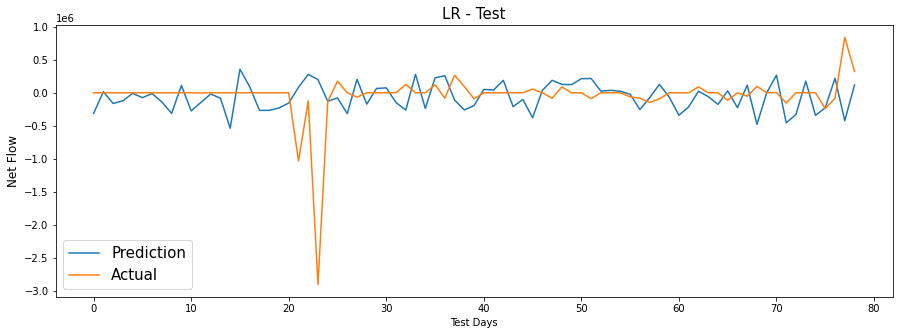

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Test Days", fontsize=10)
plt.ylabel("Net Flow", fontsize=12)
plt.title("LR - Test", fontsize=15)
plt.plot(Y_pred, label="Prediction")
plt.plot(Y_test.values, label="Actual")
plt.legend(loc = 'lower left', fontsize=15) 
# plt.savefig('LR_Daily.png')

In [ ]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if (score < 0):
        return 'Negative'
    elif (score == 0):
        return 'Neutral'
    else:
        return 'Positive'
    


In [ ]:
analysis = avg_pol.copy()
analysis['analysis'] = analysis['avg_pol'].apply(getAnalysis)
analysis

,d_subj,d_pol,b_subj,b_pol,c_subj,c_pol,avg_subj,avg_pol,analysis
Date,,,,,,,,,
2020-10-01,0.374005,0.208886,0.169704,0.041580,0.543669,0.194602,0.362459,0.148356,Positive
2020-10-02,0.353624,0.208086,0.288656,0.062248,0.534481,0.198928,0.392254,0.156421,Positive
2020-10-03,0.468362,0.086743,0.162452,0.008237,0.483005,0.228676,0.371273,0.107885,Positive
2020-10-04,0.357260,0.126469,0.133554,0.045549,0.449015,0.189158,0.313276,0.120392,Positive
2020-10-05,0.464102,0.126006,0.167671,0.075926,0.458458,0.196062,0.363410,0.132664,Positive
...,...,...,...,...,...,...,...,...,...
2022-09-25,0.487059,0.238913,0.200179,-0.010883,0.205816,0.118358,0.297685,0.115462,Positive
2022-09-26,0.421944,0.170222,0.196209,0.026117,0.365914,0.162379,0.328022,0.119573,Positive
2022-09-27,0.288444,0.041616,0.230273,0.148313,0.298727,0.160222,0.272481,0.116717,Positive


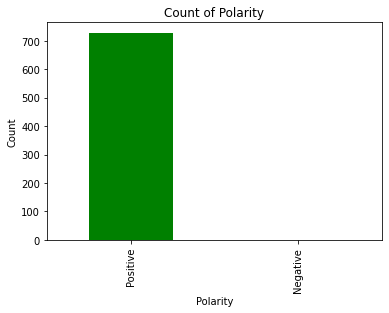

In [ ]:
fig = plt.figure(figsize=(6,4))
color = ['green', 'grey', 'red']
analysis['analysis'].value_counts().plot(kind='bar', color = color)

plt.title('Count of Polarity')
plt.ylabel('Count') 
plt.xlabel('Polarity') 
plt.grid(False)
plt.show() 

In [ ]:
def strictAnalysis(score):
    if (score < -0.1):
        return 'Negative'
    elif (score > 0.1):
        return 'Positive'
    else:
        return 'Neutral' 

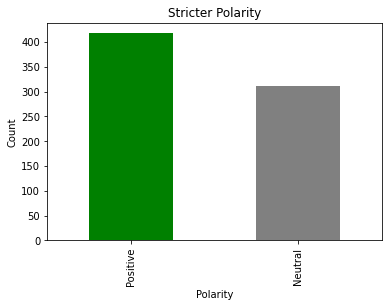

In [ ]:
analysis['analStrict'] = analysis['avg_pol'].apply(strictAnalysis) 

fig = plt.figure(figsize=(6,4))
color = ['green', 'grey','red']
analysis['analStrict'].value_counts().plot(kind='bar', color = color)

plt.title('Stricter Polarity')
plt.ylabel('Count') 
plt.xlabel('Polarity') 
plt.grid(False)
plt.show() 

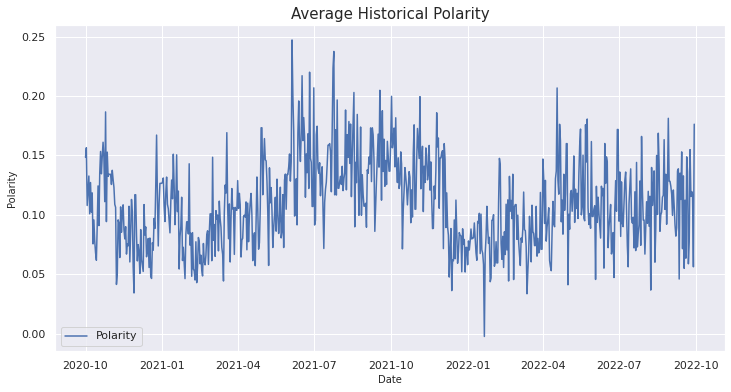

In [ ]:
sns.set(rc={'figure.figsize': (12,6)})
plt.xlabel("Date", fontsize=10)
plt.ylabel("Polarity", fontsize=10)
plt.title("Average Historical Polarity", fontsize=15)
plt.plot(analysis['avg_pol'], label="Polarity") 
plt.legend(loc='lower left')
# plt.savefig('Roll_futures.png') 

In [9]:
consol = pd.read_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/Twitter Analytics/data/avg_pol_CONS.csv', index_col='Date') 
consol 


,IC_acct_subj,IC_acct_pol,defi_subj,defi_pol,blockchan_subj,blockchain_pol,crypto_subj,crypto_pol,avg_3k_subj,avg_3k_pol,DPI_subj,DPI_pol
Date,,,,,,,,,,,,
01-10-20,NaN,NaN,0.374005,0.208886,0.169704,0.041580,0.543669,0.194602,0.362459,0.148356,NaN,NaN
02-10-20,NaN,NaN,0.353624,0.208086,0.288656,0.062248,0.534481,0.198928,0.392254,0.156421,0.29537,0.237963
03-10-20,NaN,NaN,0.468362,0.086743,0.162452,0.008237,0.483005,0.228676,0.371273,0.107885,0.57500,0.400000
04-10-20,NaN,NaN,0.357260,0.126469,0.133554,0.045549,0.449015,0.189158,0.313276,0.120392,0.00000,0.000000
05-10-20,0.000000,0.000000,0.464102,0.126006,0.167671,0.075926,0.458458,0.196062,0.363410,0.132664,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
04-12-22,0.170996,0.098918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-12-22,0.228571,0.045238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-12-22,0.169643,0.036526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


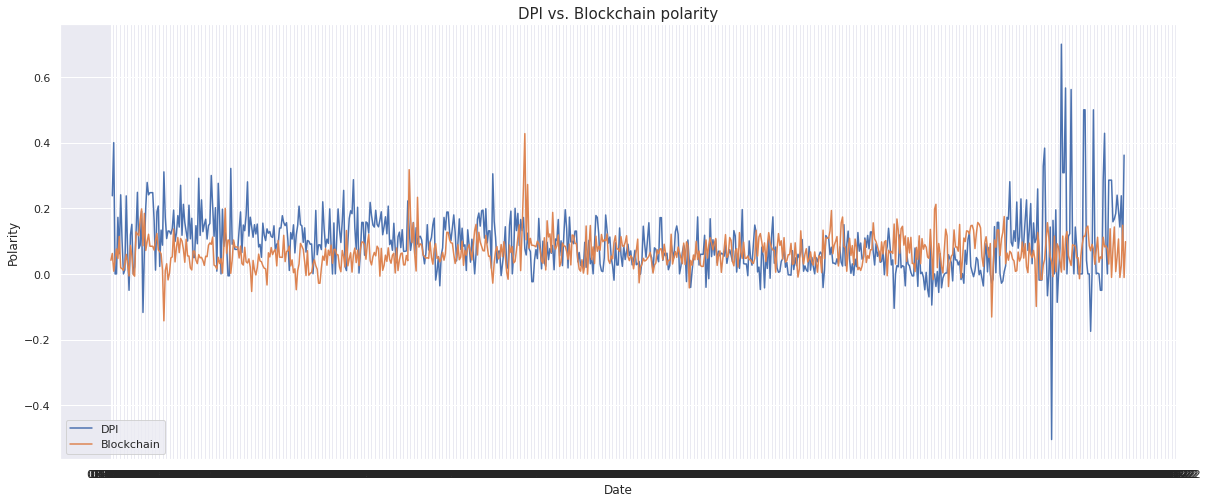

In [10]:
import seaborn as sns 

sns.set(rc={'figure.figsize': (20,8)})
plt.xlabel("Date", fontsize=12)
plt.ylabel("Polarity", fontsize=12)
plt.title("DPI vs. Blockchain polarity", fontsize=15)
plt.plot(consol['DPI_pol'], label="DPI") 
plt.plot(consol['blockchain_pol'], label="Blockchain") 

plt.legend(loc='lower left')
# plt.savefig('Roll_futures.png') 

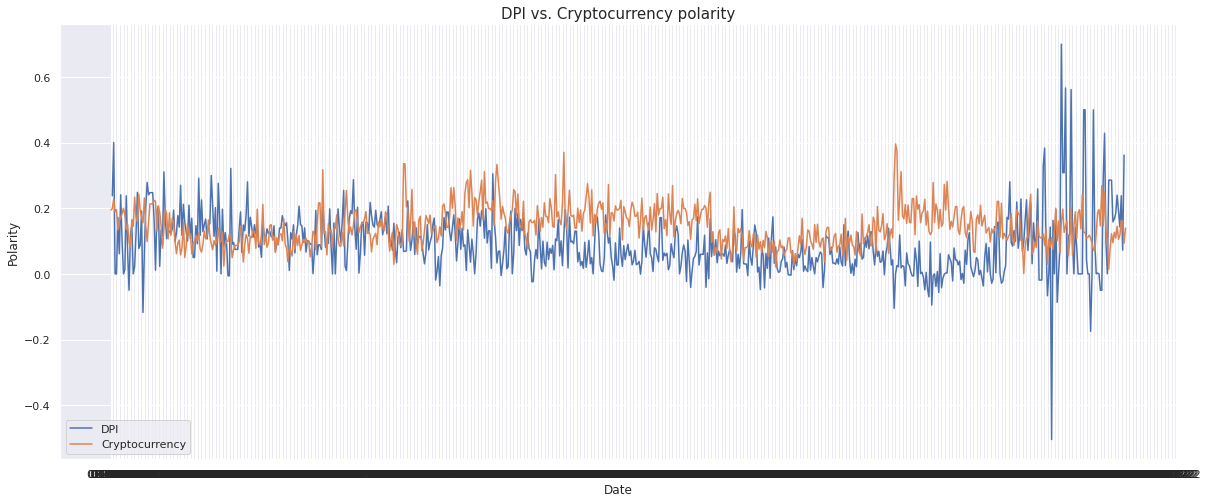

In [11]:
import seaborn as sns 

sns.set(rc={'figure.figsize': (20,8)})
plt.xlabel("Date", fontsize=12)
plt.ylabel("Polarity", fontsize=12)
plt.title("DPI vs. Cryptocurrency polarity", fontsize=15)
plt.plot(consol['DPI_pol'], label="DPI") 
plt.plot(consol['crypto_pol'], label="Cryptocurrency") 

plt.legend(loc='lower left') 

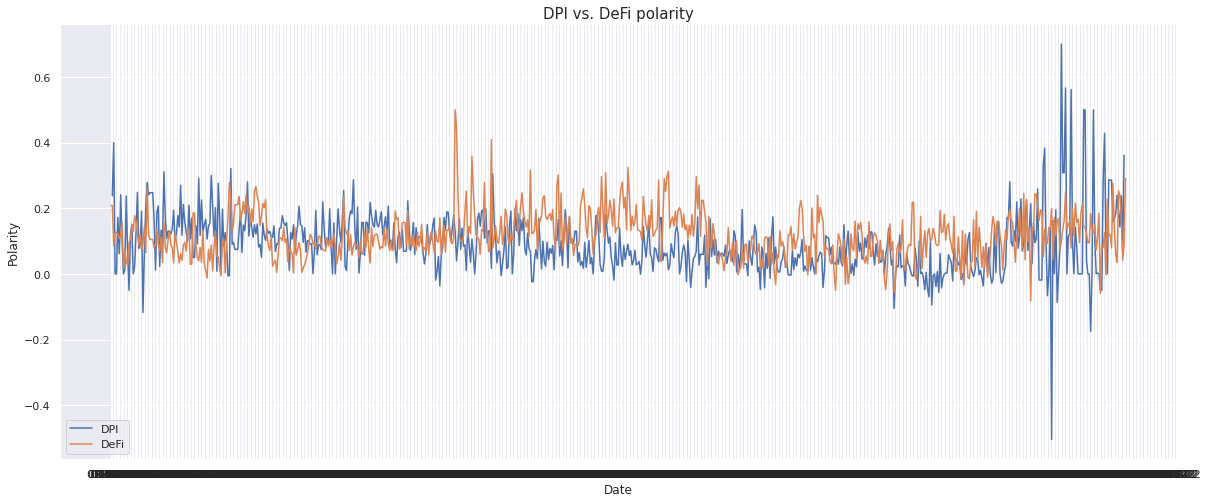

In [16]:
import seaborn as sns 

sns.set(rc={'figure.figsize': (20,8)})
plt.xlabel("Date", fontsize=12)
plt.ylabel("Polarity", fontsize=12)
plt.title("DPI vs. DeFi polarity", fontsize=15)
plt.plot(consol['DPI_pol'], label="DPI") 
plt.plot(consol['defi_pol'], label="DeFi") 

plt.legend(loc='lower left')

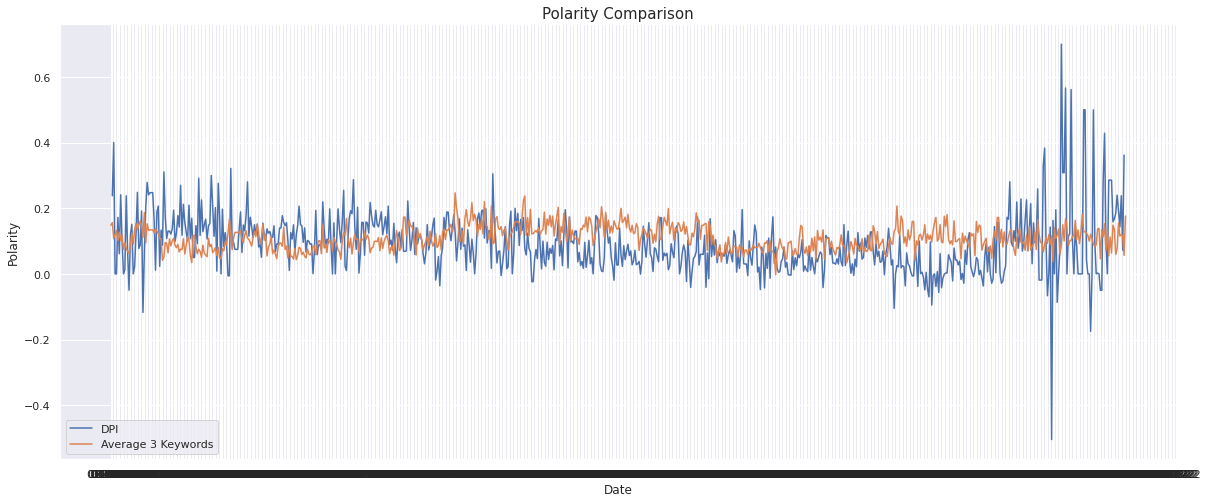

In [15]:
import seaborn as sns 

sns.set(rc={'figure.figsize': (20,8)})
plt.xlabel("Date", fontsize=12)
plt.ylabel("Polarity", fontsize=12)
plt.title("Polarity Comparison", fontsize=15)
plt.plot(consol['DPI_pol'], label="DPI") 
plt.plot(consol['avg_3k_pol'], label="Average 3 Keywords") 

plt.legend(loc='lower left')